# Recommendation System

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

In [12]:
df=pd.read_csv(r"C:\ExcelR\DS\Assignment\Recommendation System\Recommendation System\anime.csv")

In [13]:
df

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]

# EDA

In [14]:
df['anime_id'].nunique()

12294

In [24]:
df['name'].nunique()

12015

In [25]:
df['genre'].nunique()

3229

In [26]:
df['type'].nunique()

6

In [15]:
df.duplicated().sum()

0

In [17]:
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [20]:
df.shape

(12017, 7)

In [22]:
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

# Data Visualization

In [23]:
#countplot

<AxesSubplot:xlabel='count', ylabel='type'>

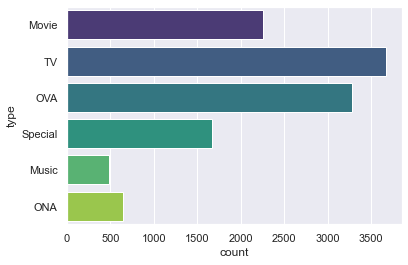

In [27]:
sns.countplot(y=df['type'])

In [30]:
df['type'].value_counts()

TV         3668
OVA        3284
Movie      2259
Special    1670
ONA         648
Music       488
Name: type, dtype: int64

# model Building

In [31]:
df

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12017 rows x 7 columns]

In [32]:
pivot= pd.pivot(data=df, index = 'anime_id',columns='type', values='rating')

In [33]:
pivot

type      Movie  Music   ONA  OVA  Special    TV
anime_id                                        
1           NaN    NaN   NaN  NaN      NaN  8.82
5           8.4    NaN   NaN  NaN      NaN   NaN
6           NaN    NaN   NaN  NaN      NaN  8.32
7           NaN    NaN   NaN  NaN      NaN  7.36
8           NaN    NaN   NaN  NaN      NaN  7.06
...         ...    ...   ...  ...      ...   ...
34476       NaN    NaN   NaN  NaN     1.67   NaN
34490       NaN    NaN   NaN  NaN      NaN  3.00
34503       NaN    NaN   NaN  NaN      NaN  3.40
34514       NaN    NaN  7.21  NaN      NaN   NaN
34519       NaN    NaN   NaN  NaN     5.67   NaN

[12017 rows x 6 columns]

In [35]:
pivot.fillna(0,inplace=True)

In [36]:
pivot

type      Movie  Music   ONA  OVA  Special    TV
anime_id                                        
1           0.0    0.0  0.00  0.0     0.00  8.82
5           8.4    0.0  0.00  0.0     0.00  0.00
6           0.0    0.0  0.00  0.0     0.00  8.32
7           0.0    0.0  0.00  0.0     0.00  7.36
8           0.0    0.0  0.00  0.0     0.00  7.06
...         ...    ...   ...  ...      ...   ...
34476       0.0    0.0  0.00  0.0     1.67  0.00
34490       0.0    0.0  0.00  0.0     0.00  3.00
34503       0.0    0.0  0.00  0.0     0.00  3.40
34514       0.0    0.0  7.21  0.0     0.00  0.00
34519       0.0    0.0  0.00  0.0     5.67  0.00

[12017 rows x 6 columns]

In [37]:
pivot.isna().sum()

type
Movie      0
Music      0
ONA        0
OVA        0
Special    0
TV         0
dtype: int64

In [38]:
#Calculate the distances and similarity

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
cosine_similarity(pivot)

array([[1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [41]:
pd.DataFrame(cosine_similarity(pivot))

0      1      2      3      4      5      6      7      8      9      \
0        1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
1        0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3        1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
4        1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12012    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12013    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12014    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12015    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12016    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  12007  12008  12009  12010  12011  12012  12013  12014  12015  \
0      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
1      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
3      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
4      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12012  ...    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
12013  ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
12014  ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
12015  ...    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    1.0   
12016  ...    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

       12016  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
12012    1.0  
12013    0.0  
12014    0.0  
12015    0.0  
12016    1.0  

[12017 rows x 12017 columns]

In [42]:
df.head(5)

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

In [43]:
sim= cosine_similarity(pivot)
sim

array([[1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [44]:
np.fill_diagonal(sim,0)

In [45]:
pd.DataFrame(sim)

0      1      2      3      4      5      6      7      8      9      \
0        0.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        1.0    0.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3        1.0    0.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0   
4        1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12012    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12013    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12014    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12015    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12016    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  12007  12008  12009  12010  12011  12012  12013  12014  12015  \
0      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
1      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
3      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
4      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12012  ...    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12013  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
12014  ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
12015  ...    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
12016  ...    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

       12016  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
12012    1.0  
12013    0.0  
12014    0.0  
12015    0.0  
12016    0.0  

[12017 rows x 12017 columns]

In [46]:
df

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12017 rows x 7 columns]

In [47]:
similarity = pd.DataFrame(sim)
similarity

0      1      2      3      4      5      6      7      8      9      \
0        0.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        1.0    0.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3        1.0    0.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0   
4        1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12012    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12013    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12014    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
12015    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12016    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  12007  12008  12009  12010  12011  12012  12013  12014  12015  \
0      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
1      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
3      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
4      ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12012  ...    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12013  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
12014  ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
12015  ...    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
12016  ...    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

       12016  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
12012    1.0  
12013    0.0  
12014    0.0  
12015    0.0  
12016    0.0  

[12017 rows x 12017 columns]

In [48]:
df['anime_id'].unique()

array([32281,  5114, 28977, ...,  5621,  6133, 26081], dtype=int64)

In [49]:
similarity.index = df['anime_id'].unique()

In [50]:
similarity.columns=df['anime_id'].unique()

In [51]:
similarity

32281  5114   28977  9253   9969   32935  11061  820    15335  15417  \
32281    0.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977    1.0    0.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
9253     1.0    0.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0   
9969     1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
5621     1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  29992  26031  10368  9352   5541   9316   5543   5621   6133   \
32281  ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
5114   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977  ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
9253   ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
9969   ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316   ...    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
5621   ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
6133   ...    0.0    0.0    1.0    1.0    1.0    0.0    0.0    0.0    0.0   
26081  ...    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

       26081  
32281    0.0  
5114     0.0  
28977    0.0  
9253     0.0  
9969     0.0  
...      ...  
9316     1.0  
5543     0.0  
5621     0.0  
6133     0.0  
26081    0.0  

[12017 rows x 12017 columns]

In [52]:
pd.set_option('display.max_columns', None)

In [53]:
similarity

32281  5114   28977  9253   9969   32935  11061  820    15335  15417  \
32281    0.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977    1.0    0.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
9253     1.0    0.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0   
9969     1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
5621     1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       4181   28851  918    2904   28891  199    23273  24701  12355  1575   \
32281    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
9253     1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
9969     1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
5621     1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       263    44     1      30276  164    7311   17074  21939  457    2001   \
32281    1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0   
5114     0.0    1.0    1.0    0.0    1.0    0.0    0.0    1.0    1.0    0.0   
28977    1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0   
9253     1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0   
9969     1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0   
5621     1.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       245    32983  5258   28957  11665  431    11741  31757  19     12365  \
32281    0.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
5114     0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
28977    0.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
9253     0.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
9969     0.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     0.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
5621     0.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       1535   32366  30654  20583  19647  4282   10379  22135  21329  31043  \
32281    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.

In [60]:
#find similar user

In [57]:
similarity.idxmax()

32281    28977
5114        44
28977    32281
9253     32281
9969     32281
         ...  
9316       329
5543     32281
5621     32281
6133      1695
26081      329
Length: 12017, dtype: int64

In [58]:
df[(df['anime_id']==32281) | (df['anime_id']==28977)]

anime_id            name  \
0     32281  Kimi no Na wa.   
2     28977        Gintama°   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   

   members  
0   200630  
2   114262

In [59]:
df[(df['anime_id']==9316 ) | (df['anime_id']== 329)]

anime_id                                          name  \
168         329                                      Planetes   
12289      9316  Toushindai My Lover: Minami tai Mecha-Minami   

                                       genre type episodes  rating  members  
168    Drama, Romance, Sci-Fi, Seinen, Space   TV       26    8.38   105044  
12289                                 Hentai  OVA        1    4.15      211